In [74]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
#G=nx.Graph()
#G.add_edges_from([(1,2),(1,3),(1,4),(3,4)], weight=3)
#G

In [78]:
data = pd.read_csv('data/activities.csv', sep=';')
data.head()

,From,To,Count
0,Stavros Langousis,George Sachpatzidis,41
1,George Sachpatzidis,Iro Papagiannopoulou,27
2,Iro Papagiannopoulou,George Sachpatzidis,20
3,Stavros Langousis,Natali Raouzaiou,16
4,George Sachpatzidis,Fotis Lavdas,14


In [114]:
# For each coworker get the total number of activities, either as initiator or as target
aggs = {'Count':['sum']}
data_from = data[['From','Count']].groupby(['From']).agg(aggs).reset_index()
data_from.columns = ['coworker','total_activities']

data_to = data[['To','Count']].groupby(['To']).agg(aggs).reset_index()
data_to.columns = ['coworker','total_activities']

concat = pd.concat([data_from, data_to])
concat = concat[['coworker','total_activities']].groupby(['coworker']).agg({'total_activities':['sum']}).reset_index()
concat.columns = ['coworker','total_activities']
concat.head()

,coworker,total_activities
0,Alexandros Fatles,24
1,Anastasios Dionisatos,25
2,Anna Keni,3
3,Antonia Remoundou,18
4,Argiris Verikios,4


In [147]:
G = nx.Graph()

for index, row in concat.iterrows():
    G.add_node(row['coworker'], group=row['coworker'], nodesize=row['total_activities'])

In [148]:
#Get the total number of activities in both directions
edges = {}
for index, row in data.iterrows():
    exists = 0 # 0 = does not exist, 1 = exists as from, to, 2 = exists as to, from
    if (row['From'],row['To']) in edges:
        exists = 1
    if (row['To'],row['From']) in edges:
        exists = 2
    
    if exists == 0:
        edges[row['From'],row['To']] = row['Count']
    if exists == 1:
        edges[row['From'],row['To']] += row['Count']
    if exists == 2:
        edges[row['To'],row['From']] += row['Count']
    
for key, value in edges.items():
    G.add_edge(key[0], key[1], color='g', weight=value)
    

In [149]:

#G.add_node('Stavros', group='Group', nodesize=200)
#G.add_node('Elena', group='Group', nodesize=5)

#G.add_weighted_edges_from([('Stavros', 'Elena', 50)])
#G.add_weighted_edges_from([('Elena', 'Stavros', 250)])

#G.add_edge('Panagiotis Diamantis','Dimitris Skenderlis',color='r',weight=100)
#G.add_edge('Dimitris Skenderlis','Panagiotis Diamantis',color='b',weight=100)

In [65]:
#G.nodes(data=True)

NodeDataView({'Stavros': {'group': 'Group', 'nodesize': 200}, 'Elena': {'group': 'Group', 'nodesize': 5}})

In [66]:
#G.node[1]['attribute']='value'
#G.nodes(data=True)

In [67]:
#nx.write_graphml(G,'so.graphml')

C:\Program Files\Anaconda3\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 432x288 with 0 Axes>

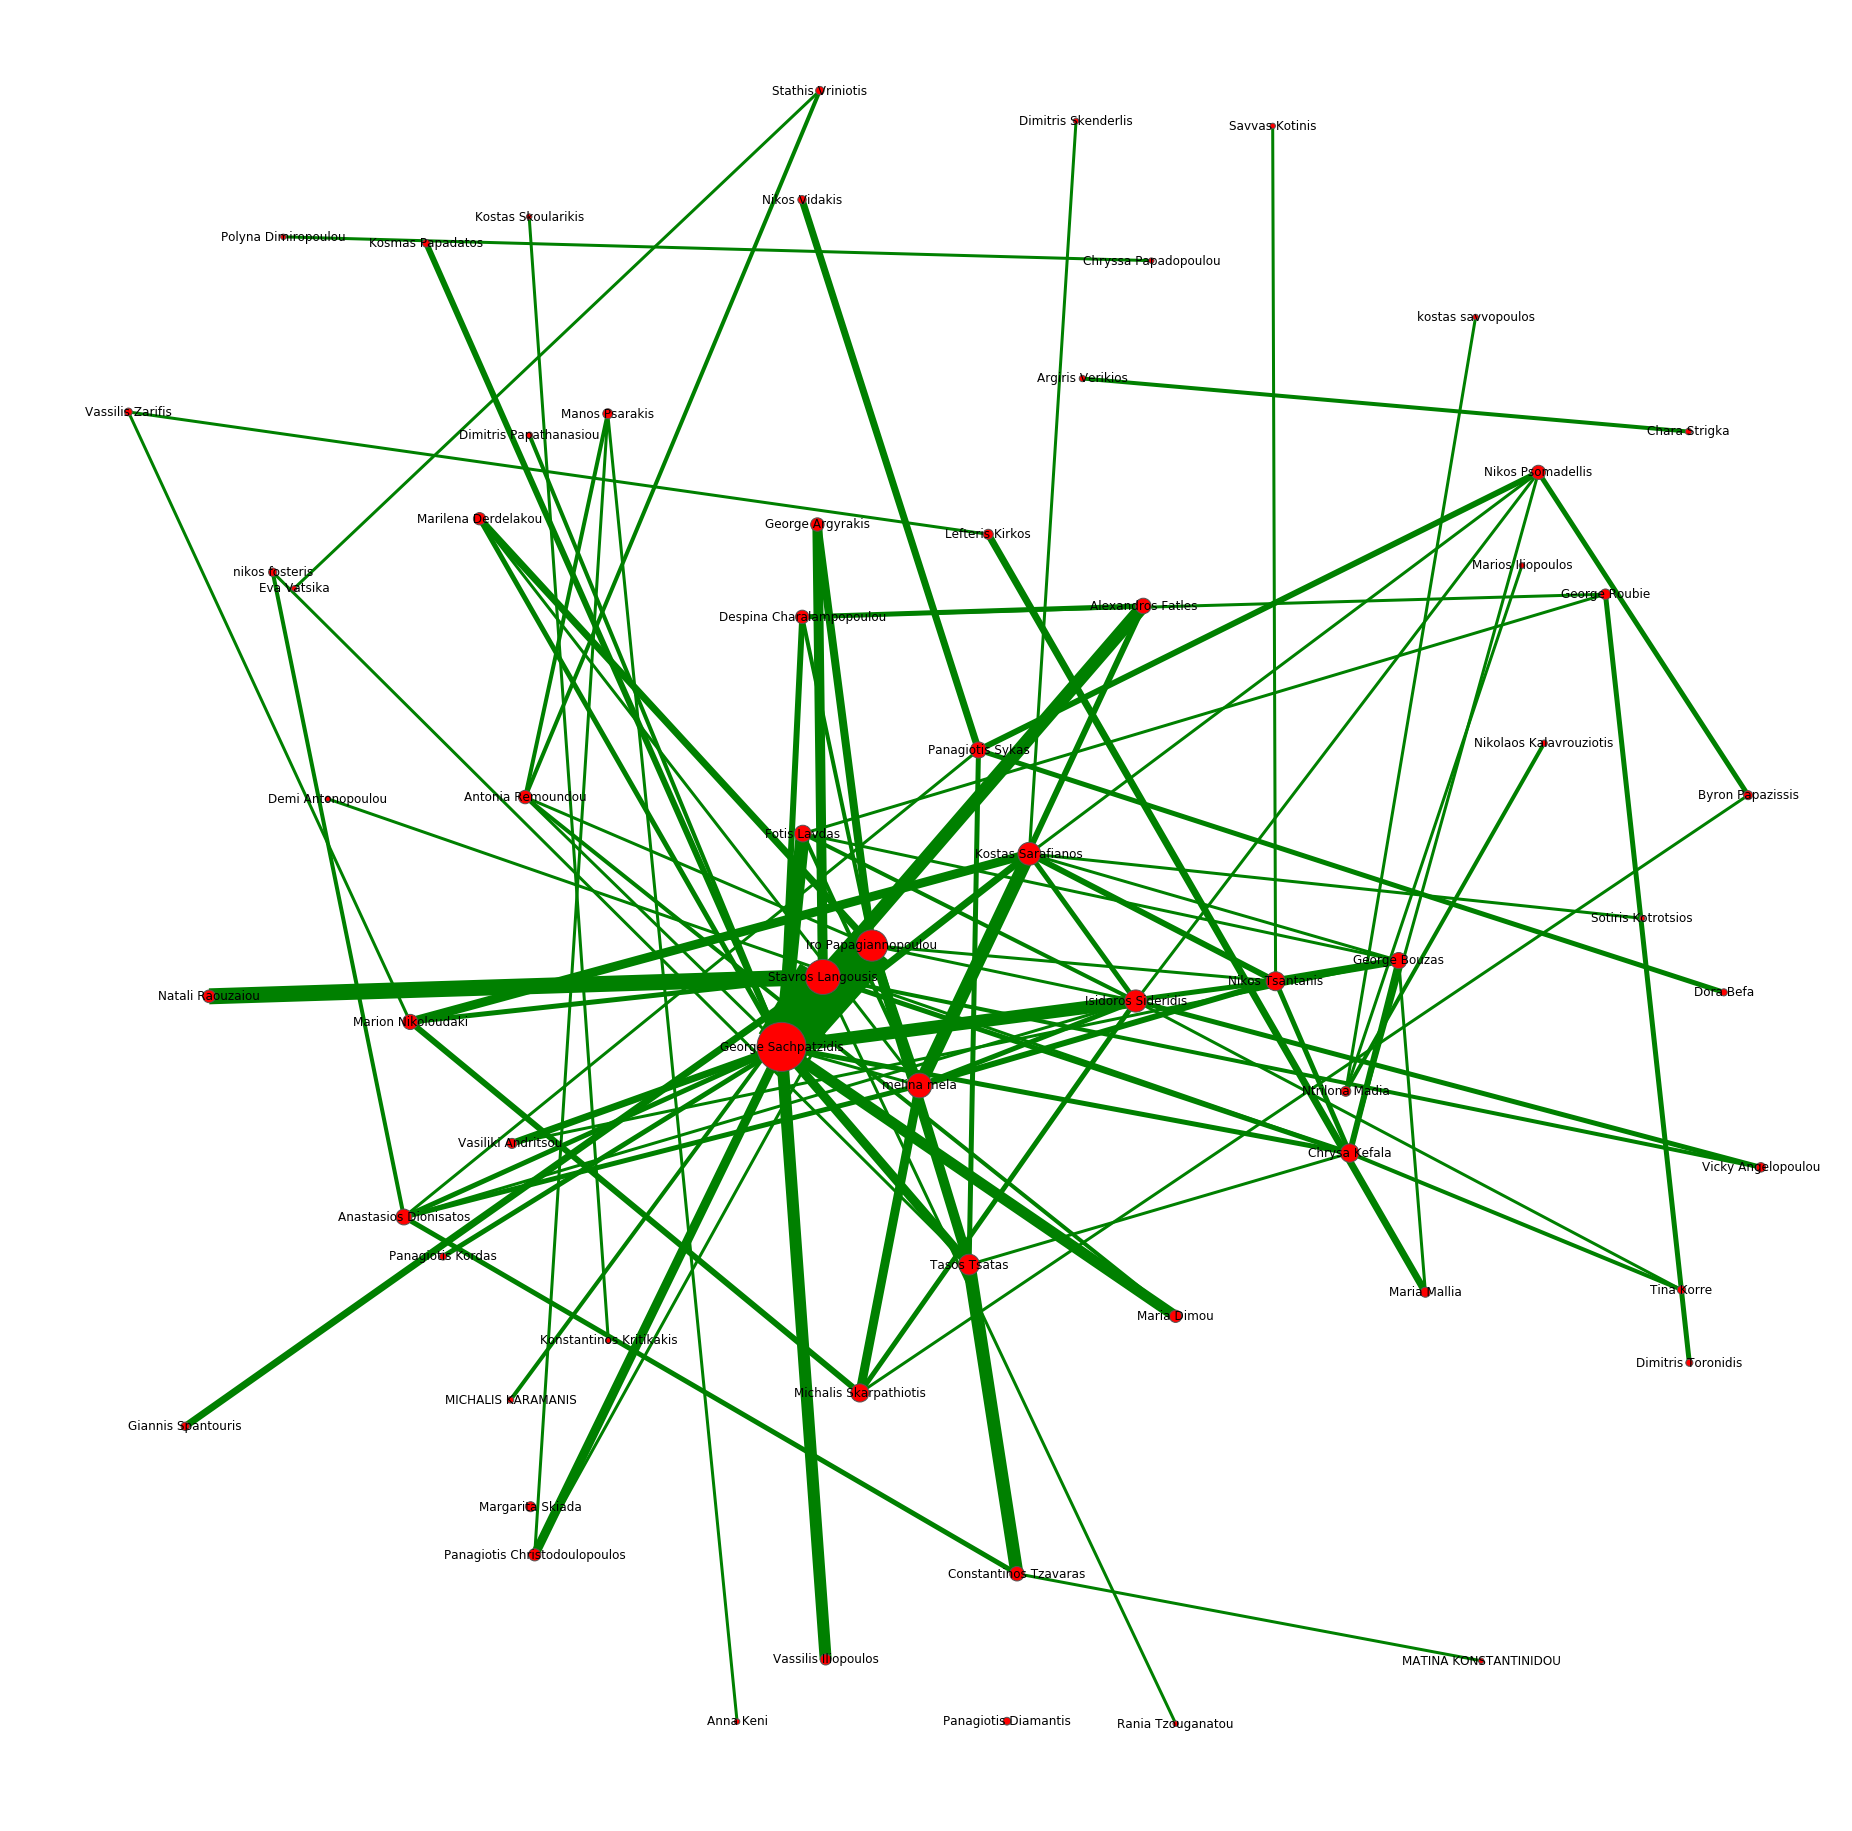

In [150]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 
plt.clf()

plt.figure(figsize=(25,25))
options = {
    'with_labels': True,
    'font_weight': 'regular',
}
#colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""

edges = G.edges()
edge_colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

#nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=0.6, iterations=10), 
        edges=edges, width=weights, edge_color=edge_colors, **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()